# Problem statement

### in this project we try to implement a twitter intent analysis that helps to overcome the chalanges of indentifying the intent of the tweets. we will use machine learning to identify the intent of the tweet with missing intent. 
### the dataset here is the given dataset from the assignment. 


# project pipeline
### the various steps involved in the project are
 - import necessary dependencies
 - read and load the dataset
 - exploratory data analysis
 - data visualization of target variables
 - data preprocessing
 - spliting data for training and prediction
 - transforiming data set with TF-IDF Vectorizer
 - model training
 - putting back the results
 
### So Let's jump into the work

# import the libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Read and load datasets

In [72]:
data = pd.read_csv("../input/tweet-intent/Tweet_NFT.xlsx - Sheet1.csv")

In [118]:
dataset = pd.read_csv('../input/tweet-intent/Tweet_NFT.xlsx - Sheet1.csv')

# Exploratory data analysis

### Columns in the data

In [4]:
data.columns

Index(['id', 'tweet_text', 'tweet_created_at', 'tweet_intent'], dtype='object')

### Shape of the data

In [5]:
data.shape

(127453, 4)

### Missing values present in the data

In [6]:
data.isna().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

### Information about the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                127453 non-null  int64 
 1   tweet_text        127453 non-null  object
 2   tweet_created_at  127453 non-null  object
 3   tweet_intent      96364 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


### Data types of all columns

In [9]:
data.dtypes

id                   int64
tweet_text          object
tweet_created_at    object
tweet_intent        object
dtype: object

### check unique target values

In [10]:
data['tweet_intent'].unique()

array(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon', nan],
      dtype=object)

# Data visualization of target values

NameError: name 'nan' is not defined

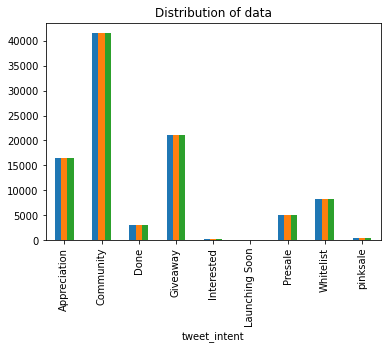

In [11]:
ax = data.groupby('tweet_intent').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon', nan], rotation=0)

In [12]:
text, intent = list(data['tweet_text']), list(data['tweet_intent'])

### Which kind of tweets are present in the data according to their quantity

<AxesSubplot:xlabel='tweet_intent', ylabel='count'>

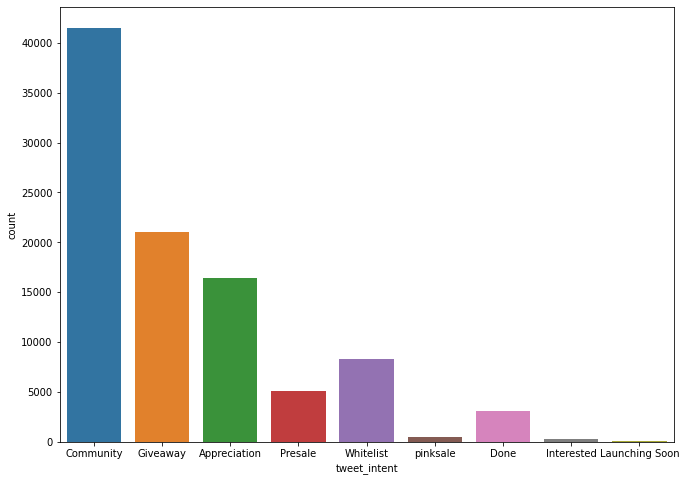

In [16]:
plt.figure(figsize = (11,8))
sns.countplot(x = 'tweet_intent', data = data)

### Tweets with the intent identified as community is the most present in the data

# Data Preprocessing
### In this section we will do a various kinds of data preprocessing. 

### Droping the unnecessary columns present in the data

In [73]:
data = data[['tweet_text', 'tweet_intent']]

### Our target variable is a categorical variable. we are just encoding this variable training purpose

In [18]:
intents = {
    'Community':0, 'Giveaway': 1 , 'Appreciation': 2, 'Presale' : 3, 'Whitelist' : 4,
       'pinksale' : 5, 'Done' : 6, 'Interested' : 7, 'Launching Soon' : 8
}

In [74]:
data['tweet_intent'] = data['tweet_intent'].replace(intents)

### In this setp we are lowercasing the words for better generalization

In [75]:
data['tweet_text'] = data['tweet_text'].str.lower()
data['tweet_text'].tail()

127448    @jason my company universe is solving this, an...
127449            @bosotokyo many will get rekt in this nft
127450    @leeneedham81 @kibainuworld @hodl_official @ko...
127451               @1kz3ro @unleashed_nft i love this job
127452    @shill_ronin @unleashed_nft my proof https://t...
Name: tweet_text, dtype: object

### removing the punctuations are necessary for any text analysis tasks

In [76]:
data['tweet_text'] = data.apply(lambda row : re.sub(r'[^\w\s]','',row.tweet_text), axis = 1)

### Cleaning for any numbers present in the tweets

In [77]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['tweet_text'] = data['tweet_text'].apply(lambda x : cleaning_numbers(x))

### removing the stopwords. these words doesn't add much mening to the analysis. But before that we are tokenizing the texts

In [78]:
stop_words = set(stopwords.words('english'))
data['tweet_text'] = data['tweet_text'].apply(lambda x : word_tokenize(x))

In [79]:
data['tweet_text'] = data['tweet_text'].apply(lambda x : [w for w in x if not w.lower() in stop_words])

### lemmatizing the tokens. This is reducing the derived words to their root form known as lemma

In [80]:
lemmatizer = WordNetLemmatizer()
data['tweet_text'] = data['tweet_text'].apply(lambda x : [lemmatizer.lemmatize(w) for w in x])

# spliting the data for training

### we split the dataset into two sets. one that has the intent and other that is missing the intents

In [81]:
train = data[data[['tweet_intent']].notna().all(axis = 1)]

In [82]:
predict = data[data['tweet_intent'].isnull()]

### Seperating the target variable

In [88]:
X = train.tweet_text
y = train.tweet_intent

In [89]:
X

0        [crypto_brody, ecology, moonrunnersnft, itsuki...
1        [need, sick, character, artâart, artist, artis...
2        [the_hulk_nft, inagotchinft, tesla, killabears...
3        [cryptobatznft, darekbtw, first, project, cryp...
4        [sashadysonn, first, project, crypto, move, ea...
                               ...                        
96359    [nft_cryptogang, liuyan, xfedaeeeaadacecbfc, t...
96360    [registered, win, cryptopunksnfts, blokpax, le...
96361    [solsniffer, dyor, nft, collection, dictator, ...
96362    [nft, nftcommmunity, deltaflare, join, discord...
96363    [duckbathing, diozoth, elonmusk, richerd, john...
Name: tweet_text, Length: 96364, dtype: object

# Transforming the data for TF-IDF Vectorizer

In [90]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000,preprocessor=' '.join, lowercase = False)
vectorizer.fit(X)


TfidfVectorizer(lowercase=False, max_features=500000, ngram_range=(1, 2),
                preprocessor=<built-in method join of str object at 0x7fc3d10e0970>)

In [86]:
X_pred = predict.tweet_text

In [91]:
X = vectorizer.transform(X)
X_pred = vectorizer.transform(X_pred)

# Model building and training

In [92]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X, y)
y_pred = clf.predict(X_pred)

# Putting back the results in a excel file

In [109]:
def reverse_dict(dict):
    new_dict = {}
    for i in dict.keys():
        j = dict[i]
        new_dict[j] = i
    return new_dict


### First we get back the classes

In [111]:
rev_intents = reverse_dict(intents)

In [113]:
len(y_pred)

31089

In [114]:
def get_class(list):
    new_list = []
    for item in list:
        for key in rev_intents.keys():
            if item == key:
                new_list.append(rev_intents[key])
    return new_list

In [115]:
y_pred_class = get_class(y_pred)

In [116]:
y_pred

array([4., 3., 4., ..., 4., 2., 6.])

In [119]:
dataset['tweet_text'] = dataset['tweet_text'].str.lower()

### Take only the rows with missing intents

In [121]:
dataset = dataset[96364:]

In [122]:
for i in range(96364,127453):
    dataset['tweet_intent'][i] = y_pred_class[i - 96364]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Export the dataframe to excel

In [124]:
file_name = 'missing_intent.xlsx'
dataset.to_excel(file_name)